In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [59]:
def generate_map(map_size=(50, 50), num_circles=3):
    gen_map = np.zeros(map_size)

    # define 
    values, probs = [1, 2, 3, 4, 5], [0.4, 0.3, 0.2, 0.05, 0.05]
    for _ in range(num_circles):
        radius = np.random.choice(values, p=probs)
        cx, cy = np.random.randint(radius + 1, map_size[0] - radius - 1), np.random.randint(radius + 1, map_size[1] - radius - 1)
        gen_map = cv2.circle(gen_map, (cx, cy), radius, color=1, thickness=-1)
    return gen_map

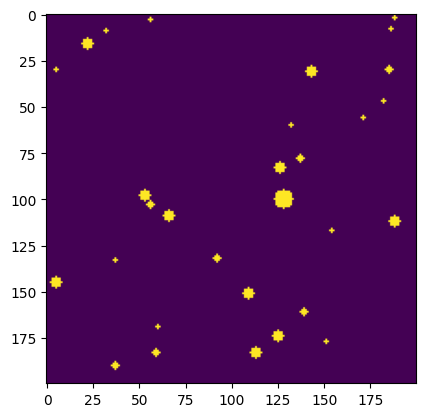

In [60]:
g_map = generate_map((200, 200), 30)
plt.imshow(g_map)

Text(0.5, 1.0, 'θ = 135')

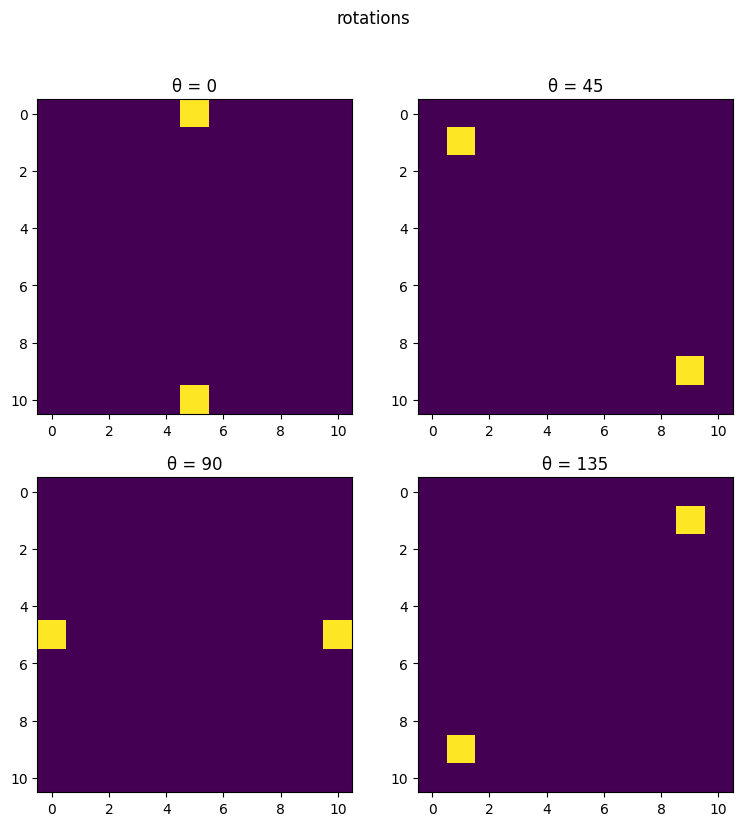

In [82]:
size = 11
stick = np.zeros((4, size, size))

stick[0, 0, size // 2] = 1
stick[0, -1, size // 2] = 1

stick[1, 1, 1] = 1
stick[1, -2, -2] = 1

stick[2, size // 2, 0] = 1
stick[2, size // 2, -1] = 1

stick[3, 1, -2] = 1
stick[3, -2, 1] = 1


fig, ax = plt.subplots(2, 2, figsize=(9, 9))
fig.suptitle('rotations')


ax[0, 0].imshow(stick[0])
ax[0, 0].set_title(f'θ = {0}')

ax[0, 1].imshow(stick[1])
ax[0, 1].set_title(f'θ = {45}')

ax[1, 0].imshow(stick[2])
ax[1, 0].set_title(f'θ = {90}')

ax[1, 1].imshow(stick[3])
ax[1, 1].set_title(f'θ = {135}')

In [83]:
import numpy as np
from scipy import signal

In [84]:
padding = 10

c_image = [np.pad(g_map, ((padding, padding), (padding, padding)), 'constant', constant_values=1) for i in range(4)]
c_image = [signal.convolve2d(c_image[i], stick[i,:,:], boundary='symm', mode='same')for i in range(4)]
c_image = [c_image[i][padding:-padding, padding:-padding] for i in range(4)]
c_space = np.array([(c_image[i] != 0) for i in range(4)])

Text(0.5, 1.0, 'θ = 135')

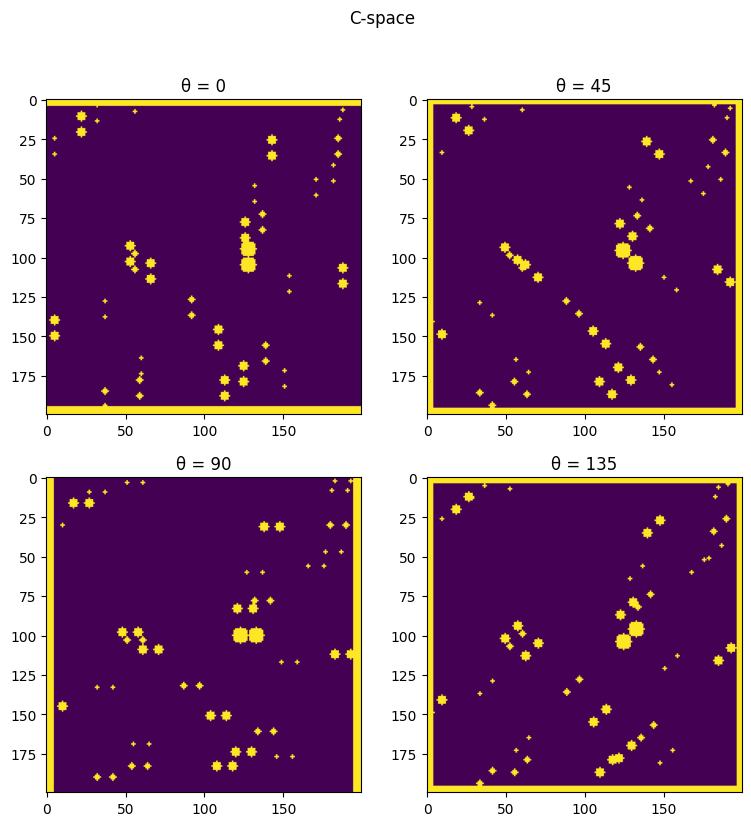

In [85]:
fig, ax = plt.subplots(2, 2, figsize=(9, 9))
fig.suptitle('C-space')


states = [(5, 10, 1), (60, 60, 2), (80, 15, 0), (50, 50, 3)]

ax[0, 0].imshow(c_space[0])
ax[0, 0].set_title(f'θ = {0}')

ax[0, 1].imshow(c_space[1])
ax[0, 1].set_title(f'θ = {45}')

ax[1, 0].imshow(c_space[2])
ax[1, 0].set_title(f'θ = {90}')

ax[1, 1].imshow(c_space[3])
ax[1, 1].set_title(f'θ = {135}')